# Introduction

In this notebook i have done analysis and visualization on 5 different dataset,dataset consist of worldwide case of corona . 

# Coronavirus

Coronaviruses are a large family of viruses which may cause illness in animals or humans.  In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.
COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019. COVID-19 is now a pandemic affecting many countries globally.

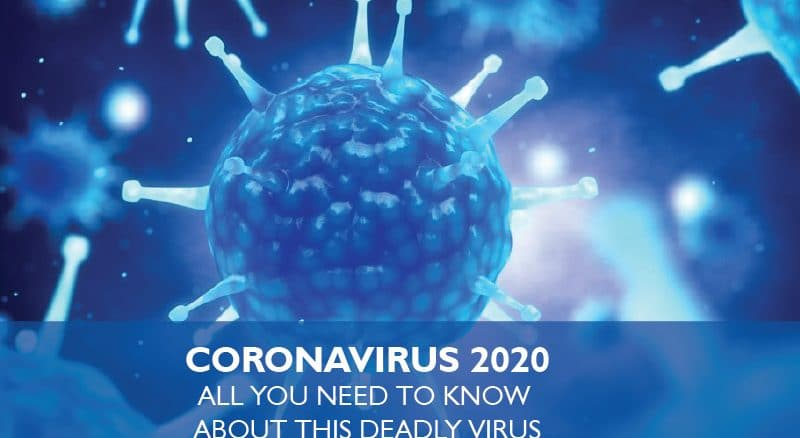

The World Health Organization declared the outbreak a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March. As of 14 September 2020, more than 29 million cases have been reported in more than 188 countries and territories, resulting in more than 924,000 deaths; more than 19.6 million people have recovered.

# Contents

* Analysing Global Coronavirus Cases
* Analysing corona case from different countries
* Doing prediction
* Data Visualization of confirmed,recovered,death case
  1. Data Table
  2. Pie chart
  3. Bar chart
* Testing US data
* Conclusion


# Importing libraries

In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
import warnings
from termcolor import colored
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use("ggplot")
%matplotlib inline
warnings.filterwarnings("ignore")

# Reading Dataset

In [ ]:
# Reading dataset
confirmed_case= pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
death_case = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
recoveries_case=pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
latest_case = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-09-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-09-2020.csv')

In [ ]:
# printing first five line of dataset
confirmed_case.head()


In [ ]:
death_case.head()

In [ ]:
recoveries_case.head()

In [ ]:
latest_case.head()

In [ ]:
us_medical_data.head()

In [ ]:
# printing name of columns
column = confirmed_case.keys()
column


In [ ]:
# printing name of columns
columns = death_case.keys()
columns

In [ ]:
# printing name of columns
columnss = recoveries_case.keys()
columnss

In [ ]:
# printing dates of the outbreaks
confirmed = confirmed_case.loc[:, column[4]:column[-1]]
deaths = death_case.loc[:, columns[4]:columns[-1]]
recoveries = recoveries_case.loc[:, columnss[4]:columnss[-1]]

In [ ]:
# printing information of confirmed,death,recovered
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)


In [ ]:
# printing total no of confirmed,death and recovered
print(confirmed_sum)
print(death_sum)
print(recovered_sum)

In [ ]:
# calculating daily increase
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 
# calculating moving increase

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# calculating confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# calculating deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# calculating recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# calculating active 
world_active_avg = moving_average(total_active, window)


In [ ]:
# changing list into array
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
# calculating future forcasting
days_in_future = 10
future_forcasting = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcasting[:-10]

In [ ]:
# Converting integer into datetime for better doing visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcasting_dates = []
for i in range(len(future_forcasting)):
    future_forcasting_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
# spliting data into train and test
x_train, x_test, y_train, y_test = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.12, shuffle=False)

# Building Model

In [ ]:
# Building SVR model
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(x_train, y_train)
svm_pred = svm_confirmed.predict(future_forcasting)
svm_test_pred = svm_confirmed.predict(x_test)
# here i am calculating MAE and MSE
print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:',mean_squared_error(svm_test_pred, y_test))

In [ ]:
# Plotting prediction vs y_test graph
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.title("SVM prediction vs y_test")
plt.legend(['Test Data', 'SVM Predictions'])

In [ ]:
# transforming our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
poly_future_forcasting = poly.fit_transform(future_forcasting)
# transforming our data for bayesian polynomial regression
bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_x_train = bayesian_poly.fit_transform(x_train)
bayesian_poly_x_test = bayesian_poly.fit_transform(x_test)
bayesian_poly_future_forcasting = bayesian_poly.fit_transform(future_forcasting)

In [ ]:
# building Linear Regression model
classifier = LinearRegression(normalize=True, fit_intercept=False)
classifier.fit(poly_x_train, y_train)
test_classifier_pred = classifier.predict(poly_x_test)
classifier_pred = classifier.predict(poly_future_forcasting)
print('MAE:', mean_absolute_error(test_classifier_pred, y_test))
print('MSE:',mean_squared_error(test_classifier_pred, y_test))
print(classifier.coef_)

In [ ]:
# Plotting test data vs polynomila regression prediction
plt.plot(y_test)
plt.plot(test_classifier_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.title('Test Data vs Polynomial Regression Predictions')

In [ ]:
# building bayesian ridge polynomial regression model
from sklearn import linear_model
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]
bayesian = BayesianRidge(fit_intercept=False)
bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

BayReg = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, 
                   return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
BayReg.fit(bayesian_poly_x_train, y_train)

In [ ]:
# printing best parameters
BayReg.best_params_

In [ ]:
# calculating MAE and MSE value
bayesian_confirmed = BayReg.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_x_test)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcasting)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test))

In [ ]:
# plotting  graph of Test Data vs Bayesian Ridge Polynomial Predictions.
plt.plot(y_test)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])
plt.title("Test Data vs Bayesian Ridge Polynomial Predictions")

# Data Visualization

In [ ]:
# visualizing rate of cases world wide vs moving average
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='blue')
plt.title('Rate of Coronavirus world Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Rate of Cases', size=15)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing rate of death cases world wide vs moving average
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='blue')
plt.title('Rate of Coronavirus death Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Rate of Cases', size=15)
plt.legend(['Worldwide death Coronavirus Cases', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing rate of recovered cases world wide vs moving average
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color="blue")
plt.title('Rate of Coronavirus recovered Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Rate of Cases', size=15)
plt.legend(['Worldwide recovered Coronavirus Cases', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing rate of active cases world wide vs moving average
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='blue')
plt.title('Rate of Coronavirus active Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Rate of Cases', size=15)
plt.legend(['Worldwide active Coronavirus Cases', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing rate of world daily increase in cases vs moving average
plt.figure(figsize=(10,8))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='blue', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('rate of Cases', size=15)
plt.legend(['Moving Average 7 days', 'World Daily Increase in COVID-19 Cases'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing rate of world daily death in cases vs moving average
plt.figure(figsize=(10,8))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='blue', linestyle='dashed')
plt.title('World Daily Increases in Confirmed death cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('rate of Cases', size=15)
plt.legend(['Moving Average 7 days', 'World Daily Increase in COVID-19 death'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing rate of world daily recovery in cases vs moving average
plt.figure(figsize=(10,8))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='blue', linestyle='dashed')
plt.title('World Daily Increases in Confirmed recovery cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('rate of Cases', size=15)
plt.legend(['Moving Average 7 days', 'World Daily Increase in COVID-19 recovery'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing log of world cases vs adjusted dates
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of world case of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('rate of Cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing log of total death case vs adjusted dates
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of world death case of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('rate of Cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# visualizing log of total recovered vs adjusted dates
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of world recovered case of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('rate of Cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

**Drawing country specific graph**


In [ ]:
# plotting graph

def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 7 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(10,8))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='blue', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 10})
    plt.title('{} Confirmed Cases'.format(country), size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('rate of Cases', size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

    plt.figure(figsize=(10,8))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='blue', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 10})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('rate of Cases', size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='blue', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 10})
    plt.title('{} Daily Increases in Deaths'.format(country), size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('rate of Cases', size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='blue', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 10})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('rate of Cases', size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_case[confirmed_case['Country/Region']==country_name][i].sum())
        country_deaths.append(death_case[death_case['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_case[recoveries_case['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)
    

In [ ]:
# Name of all country for which we are going to do visualisation
countries = ['US', 'Russia', 'India','Brazil', 'South Africa', 'China', 'Italy',
             'Germany', 'Spain', 'France', 'United Kingdom', 'Peru', 'Mexico', 'Colombia', 'Saudi Arabia', 'Iran', 'Bangladesh',
            'Pakistan'] 

for country in countries:
    country_visualizations(country)

In [ ]:
# Comparing corona cases of 5 country by doing visualisation
countries_name = ['US', 'Brazil', 'India', 'Russia', 'South Africa'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths', 'Coronavirus Confirmed Recoveries']

for num in range(3):
    plt.figure(figsize=(10,8))
    for country in countries_name:
        plt.plot(get_country_info(country)[num])
    plt.legend(countries_name, prop={'size': 10})
    plt.xlabel('Days since 3/1', size=15)
    plt.ylabel('rate of Cases', size=15)
    plt.title(graph_name[num], size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [ ]:
# Viaualizing future forcasting vs prediction
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y)
    plt.plot(future_forcasting, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('rate of Cases', size=15)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [ ]:
# visualizing Predictions for confirmed coronavirus cases worldwide

plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

In [ ]:
# Visualizing Predictions for confirmed coronavirus cases worldwide
plot_predictions(adjusted_dates, world_cases, classifier_pred, 'Polynomial Regression Predictions', 'pink')

In [ ]:
# here i am visualizing Predictions for confirmed coronavirus cases worldwide
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

**Data Table**

In [ ]:
# Future predictions using polynomial regression
linear_pred = classifier_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcasting_dates[-10:], 'Polynomial Predicted rate of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='PuBu')

In [ ]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcasting_dates[-10:], 'Bayesian Ridge Predicted rate of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='PuBu')

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcasting_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='PuBu')

**Graphing deaths against recoveries**

In [ ]:
# visualizing deaths vs world wide recoveries
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=10)
plt.title('Worldwide Coronavirus Cases', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('rate of Cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

**Plotting the number of deaths against the number of recoveries**

In [ ]:
# visualizing total deaths vs total recoveries
plt.figure(figsize=(10, 8))
plt.plot(total_recovered, total_deaths)
plt.title('rate of Coronavirus Deaths vs. rate of Coronavirus Recoveries', size=15)
plt.xlabel('rate of Coronavirus Recoveries', size=15)
plt.ylabel('rate of Coronavirus Deaths', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


**Getting information about countries/regions that have confirmed coronavirus cases**

In [ ]:
countries =  list(latest_case['Country_Region'].unique())

In [ ]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in countries:
    cases = latest_case[latest_case['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_case[latest_case['Country_Region']==countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_case[latest_case['Country_Region']==countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_case[latest_case['Country_Region']==countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_case[latest_case['Country_Region']==countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_case[latest_case['Country_Region']==countries[i]]['Incidence_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [ ]:
country_df = pd.DataFrame({'Country Name': countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases, 'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='PuBu')

**Getting the latest information about provinces/states that have confirmed coronavirus cases**

In [ ]:
unique_provinces =  list(latest_case['Province_State'].unique())

In [ ]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_active = [] 
province_incidence_rate = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_case[latest_case['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
#remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_case[latest_case['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_case[latest_case['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_case[latest_case['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_active.append(latest_case[latest_case['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_case[latest_case['Province_State']==unique_provinces[i]]['Incidence_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [ ]:
# number of cases per province/state/city top 100 
province_limit = 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': province_confirmed_cases[:province_limit],
                          'Number of Deaths': province_death_cases[:province_limit],'Number of Active Cases' : province_active[:province_limit], 
                            'Incidence Rate' : province_incidence_rate[:province_limit], 'Mortality Rate': province_mortality_rate[:province_limit]})
# number of cases per country/region

province_df.style.background_gradient(cmap='PuBu')

In [ ]:
us_states = list(latest_case[latest_case['Country_Region']=='US']['Province_State'].unique())

In [ ]:
state_confirmed_cases = []
state_death_cases = [] 
state_active = [] 
state_incidence_rate = [] 
state_mortality_rate = [] 

no_cases = [] 
for i in us_states:
    cases = latest_case[latest_case['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        state_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# removing areas with no confirmed cases
for i in no_cases:
    us_states.remove(i)
    
us_states = [k for k, v in sorted(zip(us_states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(us_states)):
    state_confirmed_cases[i] = latest_case[latest_case['Province_State']==us_states[i]]['Confirmed'].sum()
    state_death_cases.append(latest_case[latest_case['Province_State']==us_states[i]]['Deaths'].sum())
    state_active.append(latest_case[latest_case['Province_State']==us_states[i]]['Active'].sum())
    state_incidence_rate.append(latest_case[latest_case['Province_State']==us_states[i]]['Incidence_Rate'].sum())
    state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])

In [ ]:
# number of cases for us states

state_df = pd.DataFrame({'State Name': us_states, 'Number of Confirmed Cases': state_confirmed_cases,
                          'Number of Deaths': state_death_cases, 'Number of Active Cases' : state_active, 
                         'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
# number of cases per country/region

state_df.style.background_gradient(cmap='PuBu')

# Bar Chart Visualizations for COVID-19

In [ ]:
# Visualising Rate of Coronavirus Confirmed Cases
us_confirmed = latest_case[latest_case['Country_Region']=='US']['Confirmed'].sum()
outside_us_confirmed = np.sum(country_confirmed_cases) - us_confirmed
plt.figure(figsize=(10, 6))
plt.bar('United States', us_confirmed)
plt.bar('Outside United States', outside_us_confirmed)
plt.title('Rate of Coronavirus Confirmed Cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
print('Outside United States {} cases:'.format(outside_us_confirmed))
print('United States {} cases'.format(us_confirmed))
print('Total: {} cases'.format(us_confirmed+outside_us_confirmed))

In [ ]:
# Only showing 15 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [ ]:
# Plotting bar graph
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 12))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(10, 8))
    plt.barh(x, y)
    plt.title(title, size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [ ]:
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plot_bar_graphs(visual_unique_countries, log_country_confirmed_cases, 'Common Log rate of Coronavirus Confirmed Cases in Countries/Regions')

In [ ]:
# Only showing 10 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)


In [ ]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'rate of Coronavirus Confirmed Cases in Provinces/States')

In [ ]:
log_province_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases2]
plot_bar_graphs(visual_unique_provinces, log_province_confirmed_cases, 'Log of rate of Coronavirus Confirmed Cases in Provinces/States')

# Pie Chart Visualizations for COVID-19

In [ ]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=15)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

In [ ]:
plot_pie_charts(visual_unique_provinces, visual_confirmed_cases2, 'Covid-19 Confirmed Cases per State/Province/Region')

In [ ]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_case[latest_case['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_case[latest_case['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_case[latest_case['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_pie_charts(regions_5,confirmed_cases_5, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

In [ ]:
pie_chart_countries = ['US', 'Brazil', 'Russia', 'India', 'Peru', 'Mexico', 'Canada', 
                       'Australia', 'China', 'Italy', 'Germany', 'France', 'United Kingdom']

for i in pie_chart_countries:
    plot_pie_country_with_regions(i, 'Covid-19 Confirmed Cases in {}'.format(i))

# US Medical Data on Testing

In [ ]:
# Replace nan with 0
us_medical_data.fillna(value=0, inplace=True)

def plot_us_medical_data():
    states = us_medical_data['Province_State'].unique()
    testing_number = []
    testing_rate = []
    
    for i in states:
        testing_number.append(us_medical_data[us_medical_data['Province_State']==i]['People_Tested'].sum())
        testing_rate.append(us_medical_data[us_medical_data['Province_State']==i]['Testing_Rate'].max())
    
    # only show the top 15 states
    testing_states = [k for k, v in sorted(zip(states, testing_number), key=operator.itemgetter(1), reverse=True)]
    testing_rate_states = [k for k, v in sorted(zip(states, testing_rate), key=operator.itemgetter(1), reverse=True)]
  
    for i in range(len(states)):
        testing_number[i] = us_medical_data[us_medical_data['Province_State']==testing_states[i]]['People_Tested'].sum()
        testing_rate[i] = us_medical_data[us_medical_data['Province_State']==testing_rate_states[i]]['Testing_Rate'].sum()
    
    top_limit = 30 
    
    plot_bar_graphs_tall(testing_states[:top_limit], testing_number[:top_limit], 'Total Testing per State (Top 30)')
    plot_bar_graphs_tall(testing_rate_states[:top_limit], testing_rate[:top_limit], 'Testing Rate per 100,000 People (Top 30)')
 

plot_us_medical_data()

# Conclusion

Thanks for reading. I hope you like my analysis and visualization found it to be helpful. If you have any questions or suggestions, feel free to write them down in the comment section.